<a href="https://colab.research.google.com/github/ricardom98/equipo52_IA_AA/blob/main/Arboldedecision_Equipo52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.metrics import make_scorer

# Para Crear Arbol de Decisión como Imagen :
from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.ensemble import RandomForestClassifier

#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

In [2]:
#Carga del dataset en la variable df
url = 'https://raw.githubusercontent.com/ricardom98/equipo52_IA_AA/main/SouthGermanCredit.asc'

df = pd.read_csv(url, sep='\s+')
df.describe()


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [3]:
#Traduccion de los nombres de las columnas de aleman a ingles en la variable df_copy
df_copy = df.copy()
translated_cols = ["status", "duration", "credit_history", "purpose", "amount", "savings", 
                   "employment_duration", "installment_rate", "personal_status_sex", 
                   "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing",
                   "number_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk"]

df_copy.columns = translated_cols
df_copy

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#**Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida.

In [4]:
#Creacion de matrices con variables independientes X y variable dependiente Y 
X = df_copy.iloc[:,0:20] 
y = df_copy['credit_risk'] #Usamos corchetes simples para recibir una lista (1d y no tener que usar np.ravel(y) en cross validation)
print(X.shape)
print(y.shape)

(1000, 20)
(1000,)


In [5]:
#Particion del conjunto de entrenamiento del 85% y del de prueba de 15%
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size = 0.15, random_state = 7)
print('Dimensión del conjunto de entrenamiento variables independientes: ', Xtv.shape)
print('Dimensión del conjunto de prueba variables independientes: ', Xtest.shape, '\n')
print('Dimensión del conjunto de entrenamiento variable dependiente: ', ytv.shape)
print('Dimensión del conjunto de prueba variable dependiente: ', ytest.shape)

Dimensión del conjunto de entrenamiento variables independientes:  (850, 20)
Dimensión del conjunto de prueba variables independientes:  (150, 20) 

Dimensión del conjunto de entrenamiento variable dependiente:  (850,)
Dimensión del conjunto de prueba variable dependiente:  (150,)


#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:

a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).

b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.

c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.

In [6]:
# Definimos las columnas que corresponden a cada tipo de dato

#Se establecen como variables categoricas aquellas que tienen un numero finito de valores posibles
names_pipeline_cat = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing'] 

#Se establecen como variables numericas aquellas que contienen un numero muy grande de valores enteros posibles 
names_pipeline_num = ['duration','amount','age']

#Se establecen como variables binarias aquellas que solo tienen dos valores posibles
names_pipeline_bin = ['people_liable','telephone','foreign_worker']

#Se establecen como variables ordinales aquellas variables que son categoricas y que tienen un orden logico entre sus valores. 
#Por ejemplo, la variable employment duration tiene valores entre 1 y 5, donde 1 es desempleado, 2 empleado hace menos de un año y asi en adeltante
# Estas variables cuentan con valores que tienen una correlación con la variable a la que representan 
# (A mayor valor de la variable ordinal, mayor impacto tiene esto en la representación de la variable a la que esta representando).

names_pipeline_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']

#Se unen tanto categoricas como binarias para transformación futura

names_pipeline_cat_bin = names_pipeline_cat + names_pipeline_bin


In [7]:
# Definimos las Pipelines

# Transformaciones a factores categóricos de entrada: remplazo por moda y aplicación de OneHotEncoder para crear columnas Dummies
pipeline_cat_bin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                  ('OneHotE', OneHotEncoder())])

# Transformaciones a factores numéricos de entrada: remplazo con promedio y escalación en rango 1 - 2
pipeline_num = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])

# Aplicamos las transformaciones a las columnas correspondientes con ColumnTransformer

transformaciones = ColumnTransformer( transformers = [
                                                      ('numtrans', pipeline_num, names_pipeline_num ),
                                                      ('catbintrans', pipeline_cat_bin, names_pipeline_cat_bin)],
                                                      remainder='passthrough')

#**Ejercicio-4.**

In [8]:
#Definimos los modelos que se compararán entre si
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression( max_iter=3000))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RF - Random Forest:  
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  

  return modelos, nombres

In [9]:
# Se definen las métricas: accuracy, precision, recall, f1-score y Gmean

def nues_accuracy(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  accuracy = (vp + vn) / (vn + fp + fn + vp)
  return accuracy

def nues_precision(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  precision = vp / (vp + fp)
  return precision

def nues_recall(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  recall = vp / (vp + fn)
  return recall

def nues_f1score(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  f1score = (2*vp) / (2*vp + fp + fn)
  return f1score

def nues_gmean(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  recall,specifity = vp / (vp + fn), vn / (vn + fp)
  gmean =  np.sqrt(recall*specifity)
  return gmean
  


In [10]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):
  
  pipeline = Pipeline(steps=[('transformaciones',transformaciones),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

  nuestras_metricas = {'accuracy':make_scorer(nues_accuracy),
                       'precision':make_scorer(nues_precision),
                       'recall':make_scorer(nues_recall),
                       'f1score':make_scorer(nues_f1score),
                       'gmean':make_scorer(nues_gmean)}

  resultadoscv = cross_validate(pipeline, Xtv, np.ravel(ytv), scoring=nuestras_metricas, cv=cv, return_train_score=True)


  resultados.append(resultadoscv)

  print('Train Scores:\n')
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' 
        % (nombres[i],
                                                                          np.mean(resultadoscv['train_accuracy']),
                                                                          np.std(resultadoscv['train_accuracy']), 
                                                                          np.mean(resultadoscv['train_precision']),
                                                                          np.std(resultadoscv['train_precision']), 
                                                                          np.mean(resultadoscv['train_recall']),
                                                                          np.std(resultadoscv['train_recall']),
                                                                          np.mean(resultadoscv['train_f1score']),
                                                                          np.std(resultadoscv['train_f1score']),
                                                                          np.mean(resultadoscv['train_gmean']),
                                                                          np.std(resultadoscv['train_gmean']),  
                                                                          ))

  print('\nTest Scores:\n')
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' 
        % (nombres[i],
                                                                          np.mean(resultadoscv['test_accuracy']),
                                                                          np.std(resultadoscv['test_accuracy']), 
                                                                          np.mean(resultadoscv['test_precision']),
                                                                          np.std(resultadoscv['test_precision']), 
                                                                          np.mean(resultadoscv['test_recall']),
                                                                          np.std(resultadoscv['test_recall']),
                                                                          np.mean(resultadoscv['test_f1score']),
                                                                          np.std(resultadoscv['test_f1score']),
                                                                          np.mean(resultadoscv['test_gmean']),
                                                                          np.std(resultadoscv['test_gmean']),  
                                                                          ))


Train Scores:

LR:
mean Accuracy: 0.793 (0.0069)
mean Precision: 0.818 (0.0062)
mean Recall: 0.910 (0.0079)
mean f1score: 0.862 (0.0046)
Gmean: 0.679 (0.0136)


Test Scores:

LR:
mean Accuracy: 0.759 (0.0239)
mean Precision: 0.797 (0.0182)
mean Recall: 0.886 (0.0255)
mean f1score: 0.839 (0.0168)
Gmean: 0.629 (0.0391)

Train Scores:

DT:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean f1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)


Test Scores:

DT:
mean Accuracy: 0.682 (0.0428)
mean Precision: 0.783 (0.0256)
mean Recall: 0.762 (0.0484)
mean f1score: 0.772 (0.0346)
Gmean: 0.607 (0.0472)

Train Scores:

RF:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean f1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)


Test Scores:

RF:
mean Accuracy: 0.753 (0.0263)
mean Precision: 0.779 (0.0133)
mean Recall: 0.909 (0.0385)
mean f1score: 0.839 (0.0198)
Gmean: 0.579 (0.0376)



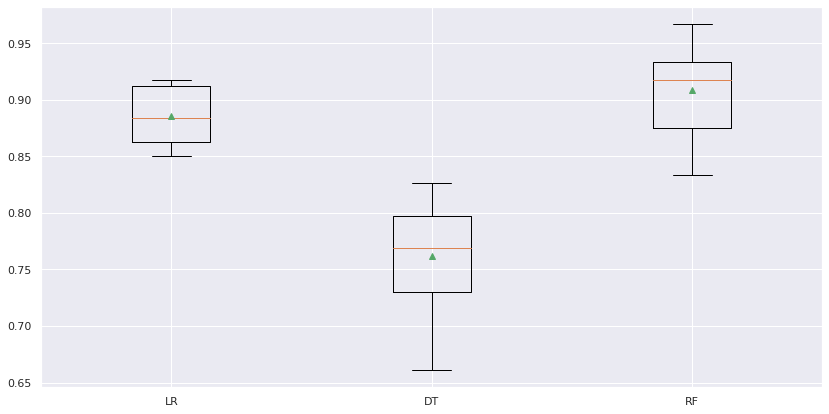

In [11]:
#Se muestra en un BoxPlot los resultados correspondientes a la métrica Recall de los tres modelos
sns.set(rc={'figure.figsize':(14,7)})

bpRecall = list()

for i in range(len(resultados)):
  results = resultados[i]['test_recall']
  bpRecall.append(results)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()

Curvas de Aprendizaje

#**Ejercicio-5.**

In [133]:
None

#**Ejercicio-6.**

In [134]:
None

###**Fin de la Actividad de la semana 6.**